# Multinomial Naïve Bayes

## Import libraries

In [167]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
np.set_printoptions(suppress = True)

## Get the dataset

In [179]:
dataset = datasets.load_iris()
flower_type = dataset.target
data = dataset.data
print(dataset.target_names)
print(dataset.feature_names)
# print(np.c_[data[:10,:5], flower_type[:10]])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [180]:
# Tomar solamente p patrones por clase
p=50
patterns = np.append(np.arange(p), [np.arange(50,50+p), np.arange(100,100+p)])
# print(patterns)
data = data[patterns,:]
flower_type = flower_type[patterns]
print(data.shape)
# print(data)
# print(flower_type)

(150, 4)


In [181]:
# Transform data type from numpy array to pandas dataframe
feature_names = np.append(dataset.feature_names,'flower type')
df = np.append(data, flower_type.reshape(-1,1), axis=1)
df = pd.DataFrame(df, columns = feature_names)
df.head(25)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower type
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


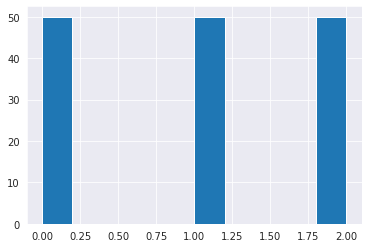

<AxesSubplot:>

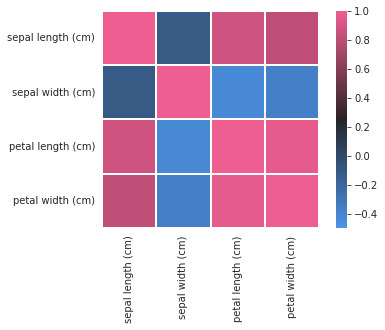

In [182]:
# Histogram and correlation matrix
plt.hist(flower_type)
plt.show()

corr = df.iloc[:,:-1].corr()

cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-0.5,cmap=cmap, square=True, linewidths=.2)

In [183]:
data2 = df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'flower type']]
# data2 = df[['petal length (cm)', 'petal width (cm)', 'flower type']]
data2.head(25)

,sepal width (cm),petal length (cm),petal width (cm),flower type
0,3.5,1.4,0.2,0.0
1,3.0,1.4,0.2,0.0
2,3.2,1.3,0.2,0.0
3,3.1,1.5,0.2,0.0
4,3.6,1.4,0.2,0.0
5,3.9,1.7,0.4,0.0
6,3.4,1.4,0.3,0.0
7,3.4,1.5,0.2,0.0
8,2.9,1.4,0.2,0.0
9,3.1,1.5,0.1,0.0


## Obtain prior probability

In [184]:
def get_priors(df,y):
    classes = sorted(list(df['flower type'].unique()))
    priors = []
    for i in classes:
        priors.append(len(df[df[y]==1]) / len(df))
    return priors

## Convert continuous features into categorical

In [209]:
bins=9
# datacat = data2.copy()
# datacat = df.copy()
datacat=pd.DataFrame()
datacat['sepal width (cm)'] = pd.cut(df['sepal width (cm)'].values, bins=bins, labels=list(np.arange(bins)))
datacat['petal length (cm)'] = pd.cut(df['petal length (cm)'].values, bins=bins, labels=list(np.arange(bins)))
datacat['petal width (cm)'] = pd.cut(df['petal width (cm)'].values, bins=bins, labels=list(np.arange(bins)))

# datacat['sepal length (cm)'] = pd.cut(df['sepal length (cm)'].values, bins=bins, labels=list(np.arange(bins)))

datacat['flower type'] = df['flower type']
datacat.head(25)

,sepal width (cm),petal length (cm),petal width (cm),flower type
0,5,0,0,0.0
1,3,0,0,0.0
2,4,0,0,0.0
3,4,0,0,0.0
4,5,0,0,0.0
5,7,1,1,0.0
6,5,0,0,0.0
7,5,0,0,0.0
8,3,0,0,0.0
9,4,0,0,0.0


## Obtain Likelihoods:
$p(x_1|C_i) \times p(x_2|C_i) \times ... \times p(x_n|C_i)$
<br><br>Then find the $i$ in $y_i$ that maximizes the likelihood value.

In [187]:
# Obtain categorical likelihood
def get_likelihood(df, feat_name, feat_val, y, label):
    feat=list(df.columns)
    df = df[df[y]==label]
    px_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return px_given_y

## Define the classifier
$P(C_j|\mathbf{x}) = p(\mathbf{x}|C_j) \times P(C_j)$

$P(C_j|\mathbf{x}) = p(x_1|C_j) \times p(x_2|C_j) \times ... \times p(x_n|C_j) \times P(C_j)$

$P(C_j|\mathbf{x}) = P(C_j) \displaystyle\prod_{i=1}^n p(x_i|C_j)  $

In [188]:
def mnbayes(df, x, y):
    # feature names
    features = list(df.columns)[:-1]
    
    # compute priors
    priors = get_priors(df,y)

    ypred = []
    # for each pattern
    for pat in x:
        # compute likelihood
        labels = sorted(list(df[y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= get_likelihood(df, features[i], pat[i], y, labels[j])
        
        # compute posteriors
        posterior = [1]*len(labels)
        for j in range(len(labels)):
            posterior[j] = likelihood[j] * priors[j]
        
        ypred.append(np.argmax(posterior))
    
    return np.array(ypred)

## Test the classifier

In [213]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, f1_score, roc_auc_score
from imblearn.metrics import sensitivity_score, specificity_score

bins = np.arange(2,50)
datacat=pd.DataFrame()
balacc = []
for bin in bins:
    print(f'\n\nBins: {bin}\n')
    del(datacat)
    datacat=pd.DataFrame()
    datacat['sepal width (cm)'] = pd.cut(df['sepal width (cm)'].values, bins=bin, labels=list(np.arange(bin)))
    datacat['petal length (cm)'] = pd.cut(df['petal length (cm)'].values, bins=bin, labels=list(np.arange(bin)))
    datacat['petal width (cm)'] = pd.cut(df['petal width (cm)'].values, bins=bin, labels=list(np.arange(bin)))
    datacat['flower type'] = df['flower type']

    train, test = train_test_split(datacat, test_size=1/2, random_state=42)
    X_test = test.iloc[:,:-1].values
    y_test = test.iloc[:,-1].values
    ypred = mnbayes(train, x=X_test, y='flower type')

    # confusionmatrix = confusion_matrix(y_test, ypred)
    balacc.append(balanced_accuracy_score(y_test, ypred))
    # print(f'Balanced accuracy: {balanced_accuracy_score(y_test, ypred)}')
    # # print(f'AUC: {roc_auc_score(y_test, ypred,average="macro", multi_class="ovo")}')
    # print(f'Accuracy: {accuracy_score(y_test, ypred)}')
    # print(f'Sensitivity: {sensitivity_score(y_test, ypred, average="micro")}')
    # print(f'Specificity: {specificity_score(y_test, ypred, average="micro")}')
    # print(f'F1-Score: {f1_score(y_test, ypred, average="macro")}')
    # disp = ConfusionMatrixDisplay(confusionmatrix)
    # disp.plot()
    # plt.grid(visible=False)
    # plt.show()




Bins: 2



Bins: 3



Bins: 4



Bins: 5



Bins: 6



Bins: 7



Bins: 8



Bins: 9



Bins: 10



Bins: 11



Bins: 12



Bins: 13



Bins: 14



Bins: 15



Bins: 16



Bins: 17



Bins: 18



Bins: 19



Bins: 20



Bins: 21



Bins: 22



Bins: 23



Bins: 24



Bins: 25



Bins: 26



Bins: 27



Bins: 28



Bins: 29



Bins: 30



Bins: 31



Bins: 32



Bins: 33



Bins: 34



Bins: 35



Bins: 36



Bins: 37



Bins: 38



Bins: 39



Bins: 40



Bins: 41



Bins: 42



Bins: 43



Bins: 44



Bins: 45



Bins: 46



Bins: 47



Bins: 48



Bins: 49



[0.7826086956521738, 0.9565217391304347, 0.8695652173913043, 0.927536231884058, 0.9420289855072465, 0.8550724637681159, 0.9130434782608696, 0.9130434782608696, 0.8260869565217391, 0.8405797101449276, 0.8260869565217391, 0.8550724637681159, 0.8550724637681159, 0.8550724637681159, 0.8695652173913043, 0.8260869565217391, 0.7971014492753623, 0.8115942028985508, 0.7971014492753623, 0.7971014492753623, 0.7971014492753623, 0.7971014492753623, 0.8260869565217391, 0.7971014492753623, 0.8115942028985508, 0.7971014492753623, 0.7681159420289855, 0.7971014492753623, 0.7681159420289855, 0.7971014492753623, 0.7681159420289855, 0.7826086956521738, 0.7826086956521738, 0.7826086956521738, 0.7826086956521738, 0.7681159420289855, 0.7826086956521738, 0.7681159420289855, 0.7826086956521738, 0.7681159420289855, 0.7826086956521738, 0.7826086956521738, 0.7826086956521738, 0.7826086956521738, 0.7826086956521738, 0.7681159420289855, 0.7681159420289855, 0.7681159420289855]
3


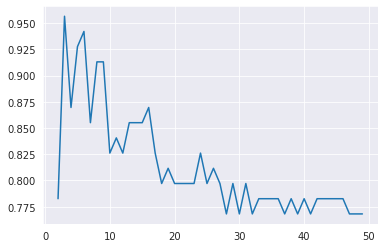

In [216]:
print(balacc)
maximo = np.argmax(balacc)
print(bins[maximo])
plt.plot(bins,balacc)
plt.show()

Balanced accuracy: 0.9130434782608696
Accuracy: 0.92
Sensitivity: 0.92
Specificity: 0.96
F1-Score: 0.9177630846635054


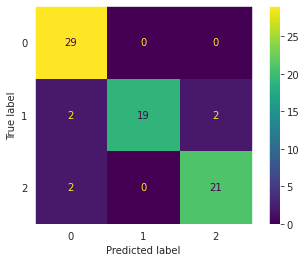

In [210]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

train, test = train_test_split(datacat, test_size=1/2, random_state=42)
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
ypred = mnbayes(train, x=X_test, y='flower type')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, f1_score, roc_auc_score
from imblearn.metrics import sensitivity_score, specificity_score
confusionmatrix = confusion_matrix(y_test, ypred)
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, ypred)}')
# print(f'AUC: {roc_auc_score(y_test, ypred,average="macro", multi_class="ovo")}')
print(f'Accuracy: {accuracy_score(y_test, ypred)}')
print(f'Sensitivity: {sensitivity_score(y_test, ypred, average="micro")}')
print(f'Specificity: {specificity_score(y_test, ypred, average="micro")}')
print(f'F1-Score: {f1_score(y_test, ypred, average="macro")}')
disp = ConfusionMatrixDisplay(confusionmatrix)
disp.plot()
plt.grid(visible=False)
plt.show()

